[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/19gCLvZi77ih5hTSAjUbHISmX-I9fi12m?usp=sharing)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import torch
from torch_geometric.utils import structured_negative_sampling

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

In [2]:
data = torch.load('graph.pt')

In [3]:
from utils import graph2df

# Creating a dataframe from the graph
pos_data = data["user", "rates", "movie"]["edge_index"]
link_exists = 1
file_name = "./dataset/movie-user.csv"
index = 1

graph2df(pos_data,data,link_exists,file_name,index)

In [4]:
# creating a dataframe with negative edges, to balance out the dataset.
neg_data = structured_negative_sampling(data["user", "rates", "movie"]["edge_index"])
file_name = "./dataset/neg_edges.csv"
link_exists = 0
index = 2

graph2df(neg_data,data,link_exists,file_name,index)

In [5]:
df = pd.read_csv("./dataset/movie-user.csv")
df.head()

,movie_id,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,link_exists
0,0,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,5,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,43,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,46,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [6]:
ndf = pd.read_csv("./dataset/neg_edges.csv")
ndf.head()

,movie_id,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,link_exists
0,2257,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,6844,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,9531,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,335,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,6824,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [7]:
# Merging both dataframes
merged_df = pd.concat([df,ndf], axis=0)
merged_df.head()

,movie_id,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,link_exists
0,0,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,5,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,43,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,46,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [8]:
merged_df.tail()

,movie_id,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,link_exists
100831,8383,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,609,0
100832,5083,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,609,0
100833,4022,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,609,0
100834,4064,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,609,0
100835,5777,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,609,0


In [9]:
# Data Exploration
num_rows, num_cols = merged_df.shape
print("Number of rows and columns:", num_rows, num_cols)
print("Data types of each column:")
print(merged_df.dtypes)

Number of rows and columns: 201672 23
Data types of each column:
movie_id              int64
(no genres listed)    int64
Action                int64
Adventure             int64
Animation             int64
Children              int64
Comedy                int64
Crime                 int64
Documentary           int64
Drama                 int64
Fantasy               int64
Film-Noir             int64
Horror                int64
IMAX                  int64
Musical               int64
Mystery               int64
Romance               int64
Sci-Fi                int64
Thriller              int64
War                   int64
Western               int64
user_id               int64
link_exists           int64
dtype: object


In [10]:
print("Missing values:")
print(merged_df.isnull().sum())

Missing values:
movie_id              0
(no genres listed)    0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
user_id               0
link_exists           0
dtype: int64


In [11]:
# User Analysis
user_counts = merged_df['user_id'].value_counts()
print("Most active users:")
user_counts

Most active users:


user_id
413    5396
598    4956
473    4216
447    3728
273    2692
       ... 
441      40
568      40
319      40
575      40
52       40
Name: count, Length: 610, dtype: int64

In [12]:
# Summary Statistics
print("Summary statistics:")
merged_df.describe()


Summary statistics:


,movie_id,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,link_exists
count,201672.000000,201672.000000,201672.000000,201672.000000,201672.000000,201672.000000,201672.000000,201672.000000,201672.000000,201672.00000,...,201672.000000,201672.000000,201672.000000,201672.000000,201672.000000,201672.000000,201672.000000,201672.000000,201672.000000,201672.000000
mean,4041.284477,0.002043,0.240936,0.181284,0.066588,0.079188,0.385502,0.142970,0.029518,0.43240,...,0.027783,0.037675,0.067173,0.170916,0.133132,0.227096,0.043710,0.017940,325.127564,0.500000
std,2875.012673,0.045153,0.427652,0.385255,0.249308,0.270033,0.486715,0.350043,0.169254,0.49541,...,0.164350,0.190410,0.250323,0.376437,0.339718,0.418956,0.204449,0.132734,182.618039,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1416.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,176.000000,0.000000
50%,3628.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,324.000000,0.500000
75%,6504.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,476.000000,1.000000
max,9741.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,609.000000,1.000000


In [13]:
# Check the class distribution
class_counts = merged_df['link_exists'].value_counts()
print(class_counts)

link_exists
1    100836
0    100836
Name: count, dtype: int64


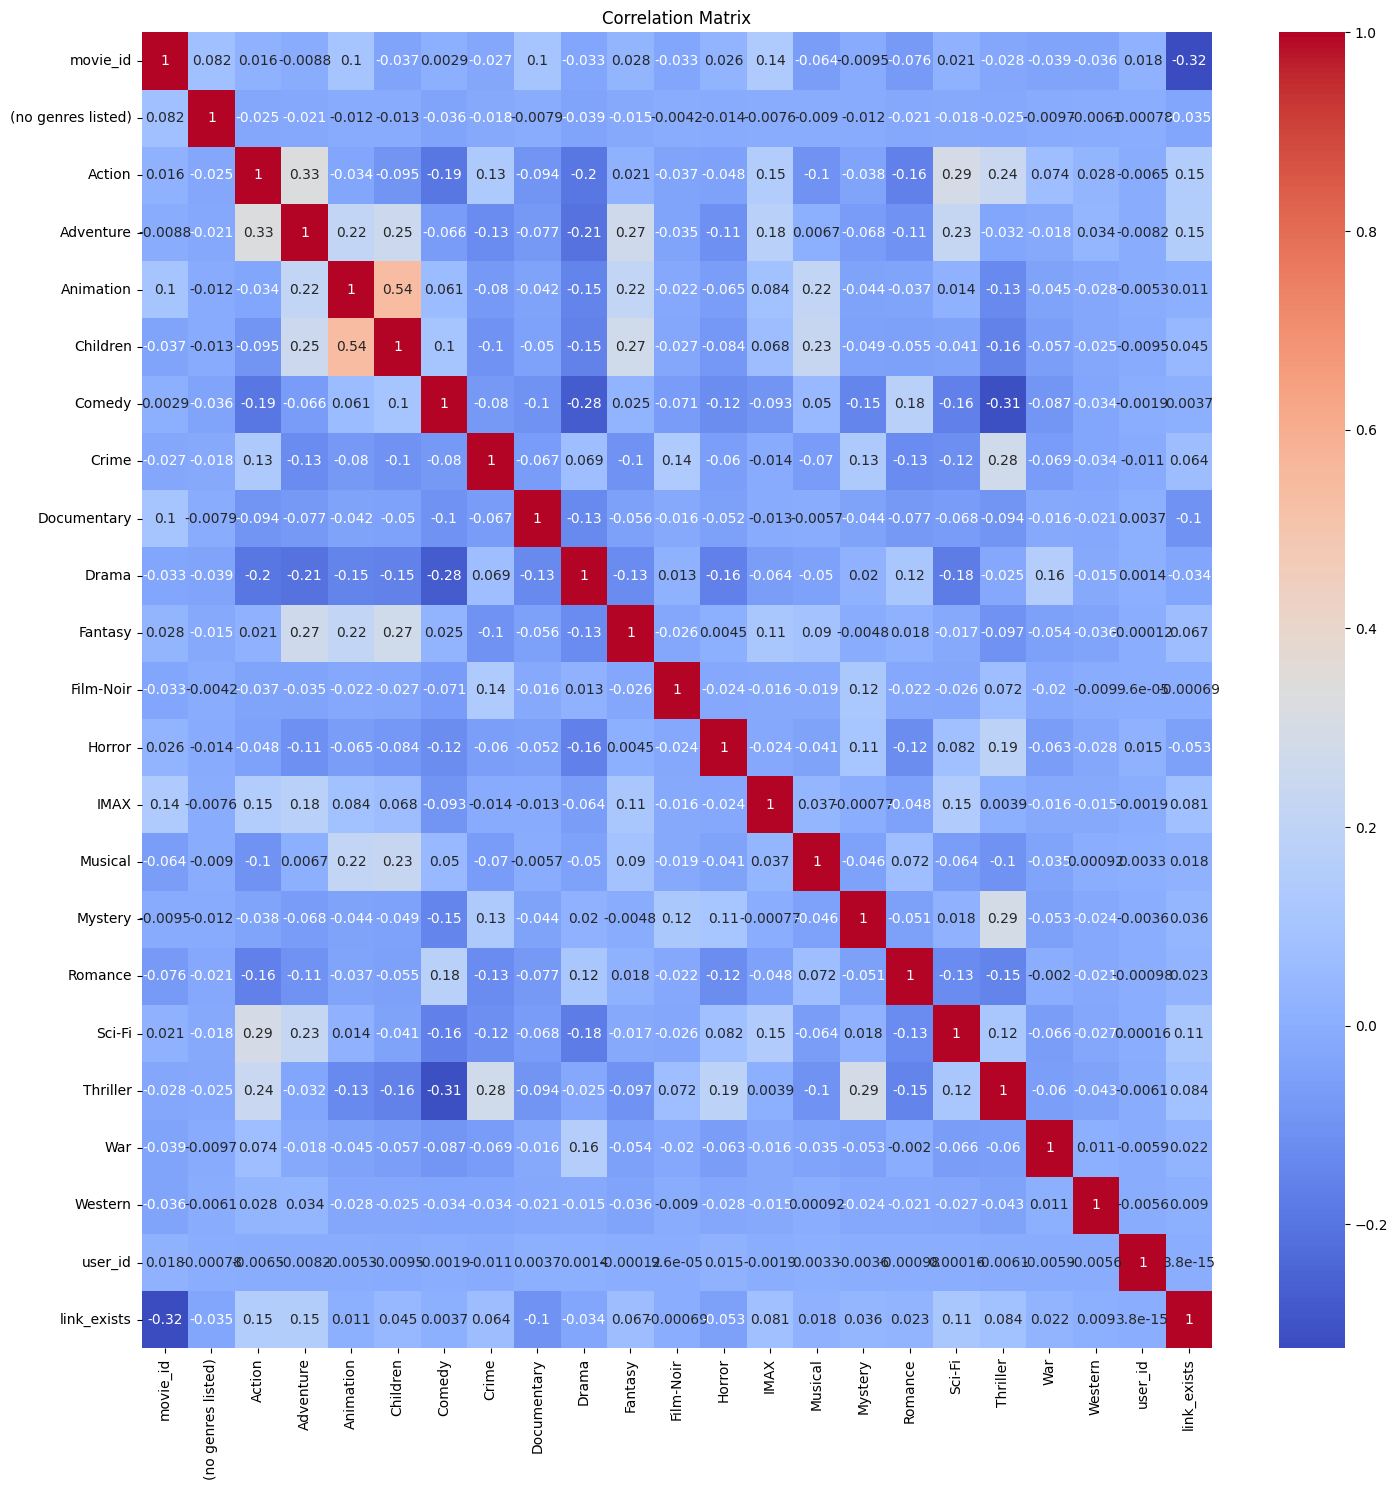

In [14]:
# Correlation analysis
corr_matrix = merged_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

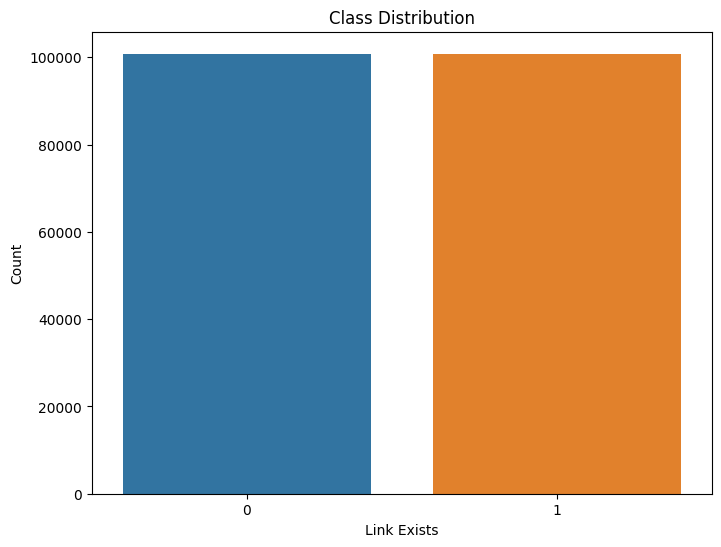

In [15]:
# Ploting the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='link_exists', data=merged_df)
plt.xlabel('Link Exists')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

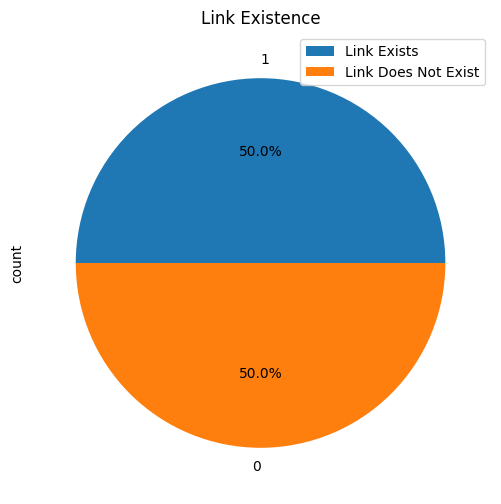

In [16]:
# Pie chart of target
merged_df['link_exists'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6))
plt.title("Link Existence")
plt.legend(["Link Exists", "Link Does Not Exist"])
plt.show()

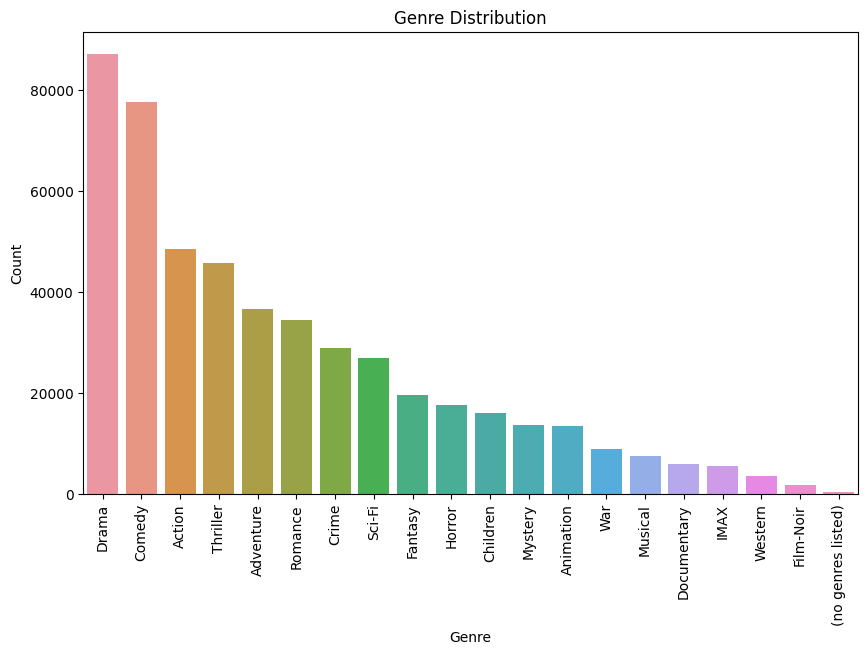

In [17]:
# Bar plot of genre distribution
genre_counts = merged_df.iloc[:, 1:-2].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title("Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

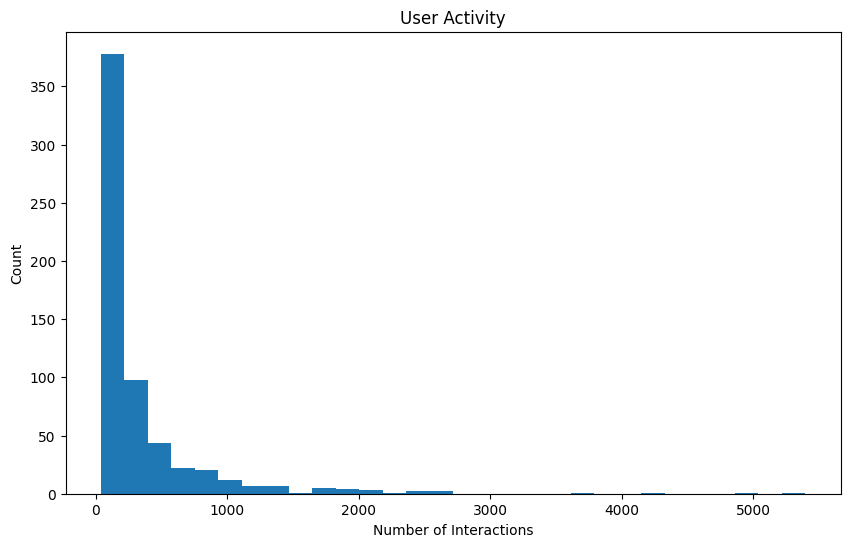

In [18]:
# Histogram of user activity
user_activity = merged_df['user_id'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(user_activity, bins=30)
plt.title("User Activity")
plt.xlabel("Number of Interactions")
plt.ylabel("Count")
plt.show()

In [19]:
# Spliting the data into features (X) and target (y)
X = merged_df.drop('link_exists', axis=1)
y = merged_df['link_exists']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [20]:
#training model
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculating accuracy and AUC score
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

print('Random Forest Accuracy:', accuracy)
print('Random Forest AUC Score:', auc_score)

Random Forest Accuracy: 0.7531920168588074
Random Forest AUC Score: 0.7531158034979056


              precision    recall  f1-score   support

           0       0.75      0.77      0.76     20246
           1       0.76      0.73      0.75     20089

    accuracy                           0.75     40335
   macro avg       0.75      0.75      0.75     40335
weighted avg       0.75      0.75      0.75     40335



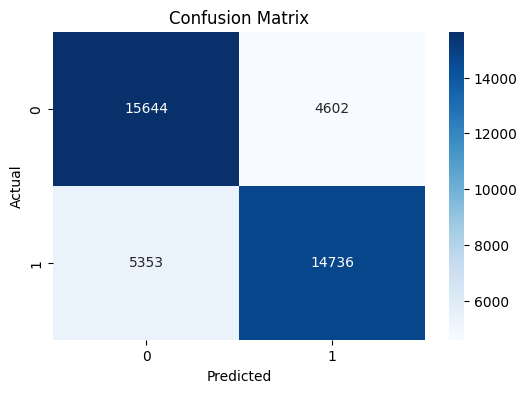

In [21]:
# Model evaluation, via confusion matrix
print(classification_report(y_test, y_pred))
confusion_mtx = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [22]:
# Calculating average feature importance
estimators = model.estimators_

feature_importances = []
for estimator in estimators:
    importance = estimator.feature_importances_
    feature_importances.append(importance)

average_importance = np.mean(feature_importances, axis=0)

for i, importance in enumerate(average_importance):
    print(f"Feature {i+1}: {importance}")


Feature 1: 0.41979780472966566
Feature 2: 0.00021957350888357006
Feature 3: 0.015964999876640858
Feature 4: 0.01615463606911955
Feature 5: 0.0060643764319124735
Feature 6: 0.004694489732739729
Feature 7: 0.012058196075193435
Feature 8: 0.008979745531751078
Feature 9: 0.005087698282402045
Feature 10: 0.011122608169389162
Feature 11: 0.008922189274606761
Feature 12: 0.0014906677377834175
Feature 13: 0.006111005795854897
Feature 14: 0.006485673240312947
Feature 15: 0.0037534932773148444
Feature 16: 0.006169711867520716
Feature 17: 0.008422437513489553
Feature 18: 0.01071786057082289
Feature 19: 0.008952412060255061
Feature 20: 0.00436788792536431
Feature 21: 0.002727929847338455
Feature 22: 0.4317346024816384


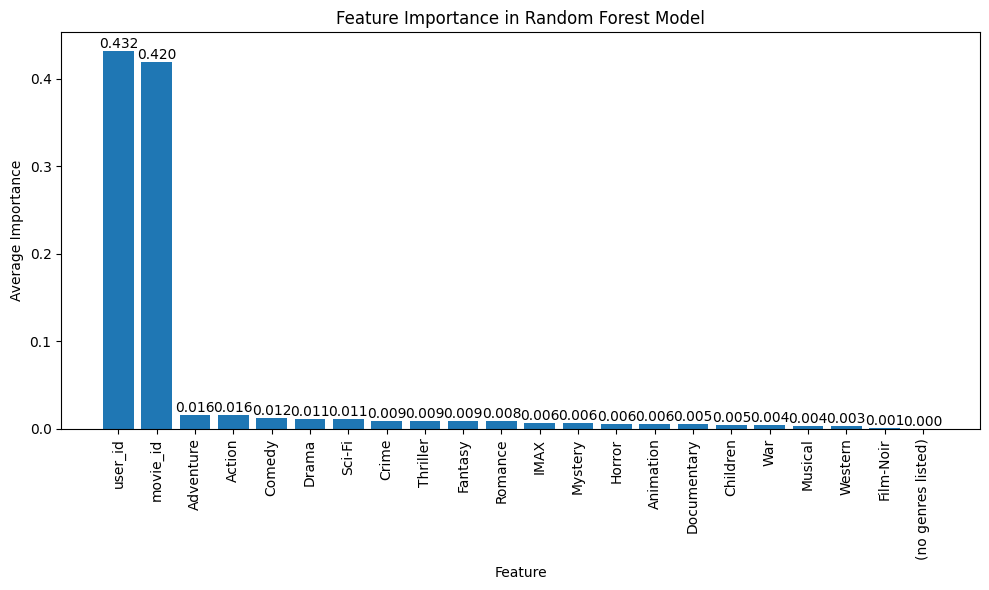

In [23]:

feature_names = X_train.columns

# Sorting the feature importance values and feature names together
sorted_indices = np.argsort(average_importance)[::-1]
sorted_importance = average_importance[sorted_indices]
sorted_names = [feature_names[i] for i in sorted_indices]

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance)
plt.xticks(range(len(sorted_importance)), sorted_names, rotation=90)  # Use feature names as x-axis labels
plt.xlabel('Feature')
plt.ylabel('Average Importance')
plt.title('Feature Importance in Random Forest Model')

# Adding labels to the bars
for i, importance in enumerate(sorted_importance):
    plt.text(i, importance, f'{importance:.3f}', ha='center', va='bottom')

plt.tight_layout()  
plt.show()

In [24]:
# Explanation of a single prediction (same target edge as GNNExplainer)
from utils import retrieve_target_nodes

movie, user = retrieve_target_nodes()
print(movie, user)
row = merged_df[(merged_df.iloc[:, 0] == movie) & (merged_df.iloc[:, -2] == user)]
row = row.drop('link_exists', axis=1)

# Printing the row
row

0 356


,movie_id,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id
54123,0,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,356


In [25]:
# Making the prediction for that edge
prediction = model.predict(row)

# Getting the predicted class label
predicted_class = prediction[0]

# Getting the predicted class probabilities
class_probabilities = model.predict_proba(row)[0]

# Getting the feature importances
feature_importances = model.feature_importances_

# Print the prediction information
print("Prediction:")
print("Predicted Class:", predicted_class)
print("Class Probabilities:", class_probabilities)
print("Feature Importances:", feature_importances)


Prediction:
Predicted Class: 1
Class Probabilities: [0. 1.]
Feature Importances: [4.19797805e-01 2.19573509e-04 1.59649999e-02 1.61546361e-02
 6.06437643e-03 4.69448973e-03 1.20581961e-02 8.97974553e-03
 5.08769828e-03 1.11226082e-02 8.92218927e-03 1.49066774e-03
 6.11100580e-03 6.48567324e-03 3.75349328e-03 6.16971187e-03
 8.42243751e-03 1.07178606e-02 8.95241206e-03 4.36788793e-03
 2.72792985e-03 4.31734602e-01]


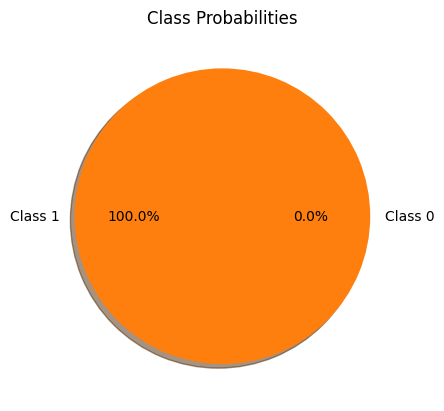

In [26]:
# Ploting class probabilities
classes = ['Class 0', 'Class 1']

plt.pie(class_probabilities, labels=classes, autopct='%1.1f%%', shadow=True)
plt.title('Class Probabilities')
plt.show()

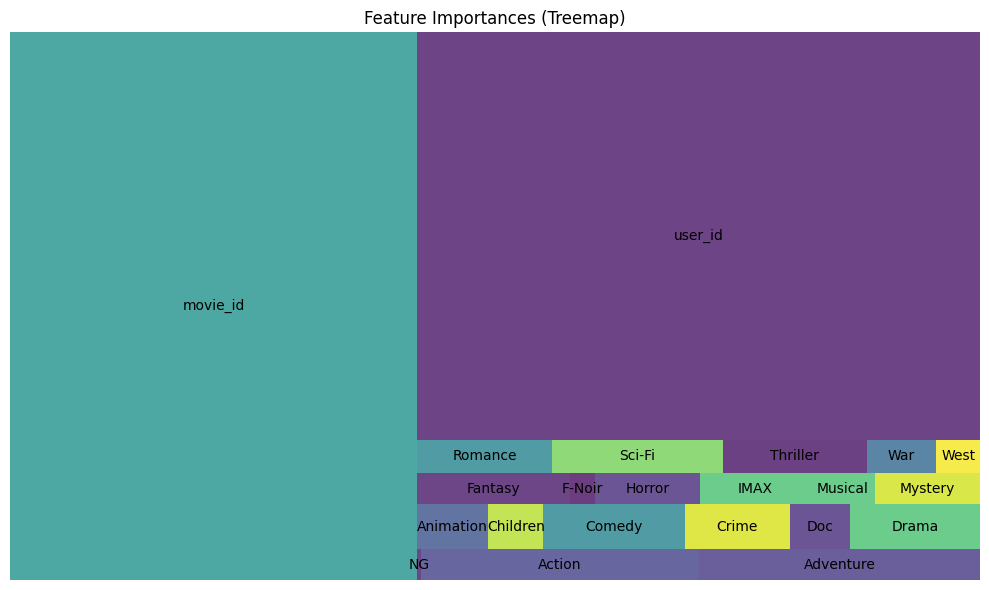

In [27]:
# Plotting feature importances for that particular edge

import squarify
import matplotlib.pyplot as plt
feature_names = list(X_train.columns)


for i in range(len(feature_names)):
    if feature_names[i]=="(no genres listed)":
        feature_names.pop(i)
        feature_names.insert(i,"NG")
    elif feature_names[i]=="Documentary":
        feature_names.pop(i)
        feature_names.insert(i,"Doc")
    elif feature_names[i]=="Western":
        feature_names.pop(i)
        feature_names.insert(i,"West")        
    elif feature_names[i]=="Film-Noir":
        feature_names.pop(i)
        feature_names.insert(i,"F-Noir")

plt.figure(figsize=(10, 6))
squarify.plot(sizes=feature_importances, label=feature_names, alpha=0.8)
plt.axis('off')
plt.title('Feature Importances (Treemap)')
plt.tight_layout()
# plt.savefig('squarify_plot.png')
plt.show()
